# Linear algebra and tensor basics

This notebook provides in introduction to essential elements of linear algebra and PyTorch tensors needed to understand the dimensionality reduction algorithms performed by *flowTorch*.

In [1]:
import torch as pt
import visualization as vis
import matplotlib.pyplot as plt
from math import sqrt

## PyTorch Tensors

PyTorch provides a [tensor](https://pytorch.org/docs/stable/tensors.html) type to define n-dimensional arrays. Each element in a tensor must be of the same type. Working with PyTorch tensors has a very similar look and feel as working with Numpy arrays. flowTorch uses PyTorch tensors as data structure for field data.

### Creating Tensors

In [2]:
# creating a vector of length 10 initialized with zeros
origin = pt.zeros(10)
origin

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
# the two most important tensor attributes: size and dtype
print("Dimension: ", origin.size())
print("Datatype: ", origin.dtype)

Dimension:  torch.Size([10])
Datatype:  torch.float32


In [4]:
# create a 2D tensor with 3 rows and two columns filled with ones
ones = pt.ones((3, 2))
ones

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [5]:
# 1D tensor with 5 linearly spaced values between zero and ten
x = pt.linspace(0, 10, 5)
x

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [6]:
# creating a tensor from a Python list
X_list = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
]
X = pt.tensor(X_list)
print("Created tensor of shape ", X.size())
X

Created tensor of shape  torch.Size([4, 3])


tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

### Accessing elements in a tensor

PyTorch tensor support element access via the typical square bracket syntax. Also slicing is supported.

In [7]:
# accessing the element in the fourth row and thrid column
X[3, 2]

tensor(11)

In [8]:
# accessing the first column
X[:, 0]

tensor([0, 3, 6, 9])

In [9]:
# accessing the second row
X[1]

tensor([3, 4, 5])

In [10]:
# accessing the first two elements in the second column
print("Created tensor of shape ", X.size())
X
X[:2, 1]

Created tensor of shape  torch.Size([4, 3])


tensor([1, 4])

In [11]:
# accessing the last two column of the thrid row
X[2, -2:]

tensor([7, 8])

### Basic tensor operations

In [12]:
# elementwise addition of a scalar value
X = pt.zeros((2, 3))
X += 2
X

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [13]:
# elementwise multiplication with a scalar value
Y = X * 2
Y

tensor([[4., 4., 4.],
        [4., 4., 4.]])

In [14]:
# elementwise subtraction of two tensors with the same shape
X - Y

tensor([[-2., -2., -2.],
        [-2., -2., -2.]])

In [15]:
# elementwise multiplication of two tensors with the same shape
X * Y

tensor([[8., 8., 8.],
        [8., 8., 8.]])

In [16]:
# subtracting a 1D tensor from each row
ones = pt.ones((1, Y.size()[1]))
print("Shape of 1D tensor: ", ones.size())
Y - ones

Shape of 1D tensor:  torch.Size([1, 3])


tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [17]:
# subtracting a 1D tensor from each column
twos = pt.ones((Y.size()[0]), 1) * 2
print("Shape of 1D tensor: ", twos.size())
Y - twos

Shape of 1D tensor:  torch.Size([2, 1])


tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [18]:
# transpose (swapping rows and columns in 2D)
print("Shape of Y/Y.T: ", Y.size(), "/", Y.T.size())
Y.T

Shape of Y/Y.T:  torch.Size([2, 3]) / torch.Size([3, 2])


tensor([[4., 4.],
        [4., 4.],
        [4., 4.]])

## Linear algebra basics
### Scalar product

The scalar or dot product between two vectors $\mathbf{a}$ and $\mathbf{b}$ of length $N$ is defined as:

$$
  \langle \mathbf{a}, \mathbf{b} \rangle := \sum\limits_{i=1}^{N} a_i b_i.
$$
The dot product has couple of useful properties; see section 1.2 in [Introduction to linear algebra](https://math.mit.edu/~gs/linearalgebra/).

1) The dot product of a vector with itself is equal to the squared length/magnitude
$ \langle \mathbf{a}, \mathbf{a} \rangle = \left\|\mathbf{a}\right\|^2_2 $

example: $\mathbf{a} = (1, 2, 2)^T$; $\langle \mathbf{a}, \mathbf{a} \rangle = 1^2 + 2^2 + 2^2 = 9$

In [19]:
import torch as pt
a = pt.tensor([1.0, 2.0, 2.0])
# Frobenius/2-norm
len_a = pt.norm(a)
assert pt.dot(a, a) == len_a**2
pt.dot(a, a)

tensor(9.)

2) The angle between two normalized vectors is equal to the cosine of the enclosed angle: 
$$
  {\displaystyle \varphi =\arccos {\frac {\langle \mathbf{a} ,{\mathbf {b}\rangle}}{|{\mathbf {a}}||{\mathbf {b}}|}}}
$$

example:$\mathbf {a} = (1,1,1),\mathbf {b} = (4,2,2) $ <br />
        $|{\mathbf {a}}|= {\sqrt {{{1}^2}+{{1}^2}+{{1}^2}}} = 1,7321$ ,
        $|{\mathbf {b}}|= {\sqrt {{{4}^2}+{{2}^2}+{{2}^2}}} = 4,8990$ ,
        $\langle \mathbf{a}, \mathbf{b} \rangle = 1\times4+1\times2+1\times2 = 8 $<br />
        ${\displaystyle \varphi =\arccos {\frac {8}{1,7321\times4,8990}=0.3398}}$




In [20]:
a = pt.tensor([1.0, 1.0, 1.0])
b = pt.tensor([4.0, 2.0, 2.0])
c = pt.dot(a, b)/(pt.norm(a)*pt.norm(b)) 
angle = pt.acos(c) # angle in radians
assert pt.isclose(angle, pt.tensor(0.3398), atol=1.0E-3)
c,angle

(tensor(0.9428), tensor(0.3398))

3) To find a unit vector with the same direction as a given vector, we divide by the magnitude of the vector : <br />

$$ {\displaystyle u = {\frac { \mathbf{a} }{||{\mathbf {a}}||}}}= {\frac {[x,y,z]}{\sqrt {{x}^{2}+{y}^{2}+{z}^{2}}}} $$ <br />

example:<br />  All unit vectors have a magnitude of 1, so to verify we are correct: $ \mathbf{a} = (3,6,1)  $ $,$ $ ||{\mathbf {a}}|| = \sqrt {46} $ <br />

$||{\mathbf {u}}||$ = ${\sqrt {(\frac {3}{\sqrt {46}})^{2}+(\frac {6}{\sqrt {46} })^{2}+(\frac {1}{\sqrt {46} })^{2}}}$ = 1






In [21]:
a = pt.tensor([3.0, 6.0, 1.0])
divisor = pt.norm(a)
b = pt.div(a, divisor)
a_lenght = pt.norm(b)
assert pt.isclose(a_lenght, pt.tensor(1.0), atol=1.0E-3)
a_lenght

tensor(1.0000)

6) two vectors are orthogonal if and only if their dot product is zero :
$${\mathbf  {{a}}={\begin{bmatrix}x_1\\0\end{bmatrix}},\quad{\mathbf{b}}={\begin{bmatrix}0\\x_2\end{bmatrix}}}$$
example: ${\mathbf  {{a}}={\begin{bmatrix}3\\0\end{bmatrix}},\quad {\mathbf{b}}={\begin{bmatrix}0\\2\end{bmatrix}}}$ ,$\quad$ ${\displaystyle \varphi =\arccos {\frac {{0}}{\sqrt {2}\times{\sqrt {3}}}=90^{\circ} }}$

In [22]:
a = pt.tensor([3.0, 0.0])
b = pt.tensor([0.0, 2.0])
c = pt.dot(a, b)/(pt.norm(a)*pt.norm(b)) 
d = pt.acos(c) # angle radian
angle = pt.rad2deg(d) # angle in degrees
assert pt.isclose(angle, pt.tensor(90.), atol=1.0E-3)
angle

tensor(90.)

### Cross product
The cross product is a vector operation that acts on vectors in three dimensions and results in another vector in three dimensions is defined as:

 $$  \mathbf{a}\times\mathbf{b} = \sum_{i,j,k=1}^3 \varepsilon_{ijk} a_i b_j \vec e_k\,. $$ <br />




1) The cross product in $R^n$  :
$$
\vec a_1=\begin{bmatrix}a_{11} \\ a_{21} \\ \vdots \\ a_{n1}\end{bmatrix}, \ \vec a_2=\begin{bmatrix}a_{12} \\ a_{22} \\ \vdots \\ a_{n2}\end{bmatrix}, \ \dots,\ \vec a_{n1}=\begin{bmatrix}a_{1\, (n-1)} \\ a_{2\, (n-1)} \\ \vdots \\ a_{n\, (n-1)}\end{bmatrix} \in \ R^n$$

can be calculated as follows: :

$$
  {\displaystyle {\vec {a}}_{1}\times {\vec {a}}_{2}\times \cdots \times {\vec {a}}_{n-1}=\det {\begin{bmatrix}{\vec {e}}_{1}&a_{11}&\cdots &a_{1(n-1)}\\{\vec {e}}_{2}&a_{21}&\cdots &a_{2(n-1)}\\\vdots &\vdots &\ddots &\vdots \\{\vec {e}}_{n}&a_{n1}&\dots &a_{n(n-1)}\end{bmatrix}},}
$$<br />

example:
$
\mathbf{a}=\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \text{ , }\mathbf{b}=\begin{bmatrix} 3 \\ 2 \\ 1 \end{bmatrix}
$<br />

${\mathbf{a}}\times{\mathbf{b}}=\begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}\cdot\begin{bmatrix}3 \\ 2 \\ 1 \end{bmatrix}=\begin{bmatrix}2\cdot1 - 3\cdot2 \\3\cdot3 - 1\cdot1 \\1\cdot2 - 2\cdot3\end{bmatrix}\,=\begin{bmatrix}-4 \\ 8 \\ -4\end{bmatrix}$



In [23]:
a = pt.tensor([1.0, 2.0, 3.0])
b = pt.tensor([3.0, 2.0, 1.0])
c = pt.cross(a, b)
assert pt.equal(c, pt.tensor([-4., 8., -4.]))
c

tensor([-4.,  8., -4.])

2) The cross product can also be expressed as the formal determinant:
$$
{\displaystyle \mathbf {a\times b} ={\begin{vmatrix}\mathbf {i} &\mathbf {j} &\mathbf {k} \\a_{1}&a_{2}&a_{3}\\b_{1}&b_{2}&b_{3}\\\end{vmatrix}}}
$$
This determinant can be computed using cofactor expansion.Using cofactor expansion, it expands to:
$$
{\displaystyle {\begin{aligned}\mathbf {a\times b} &={\begin{vmatrix}a_{2}&a_{3}\\b_{2}&b_{3}\end{vmatrix}}\mathbf {i} -{\begin{vmatrix}a_{1}&a_{3}\\b_{1}&b_{3}\end{vmatrix}}\mathbf {j} +{\begin{vmatrix}a_{1}&a_{2}\\b_{1}&b_{2}\end{vmatrix}}\mathbf {k} \\&=(a_{2}b_{3}-a_{3}b_{2})\mathbf {i} -(a_{1}b_{3}-a_{3}b_{1})\mathbf {j} +(a_{1}b_{2}-a_{2}b_{1})\mathbf {k} ,\end{aligned}}}
$$
<br />
Example: ${\displaystyle \mathbf {a\times b} ={\begin{vmatrix}  \mathbf i& \mathbf j& \mathbf k \\4&-2&5\\2&8&7\\\end{vmatrix}}}$
${\displaystyle {\begin{aligned}={\mathbf{i}\begin{vmatrix}-2&5\\8&7\end{vmatrix}} -{\mathbf{j}\begin{vmatrix}4&5\\2&7\end{vmatrix}} +{\mathbf{k}\begin{vmatrix}4&-2\\2&8\end{vmatrix}} =(-54)\mathbf {i} -(18)\mathbf {j} +(36)\mathbf {k}\end{aligned}}}$

In [24]:
a = pt.tensor([4.0, -2.0, 5.0]) 
b = pt.tensor([2.0, 8.0, 7.0])
c = pt.cross(a, b)
assert pt.equal(c, pt.tensor([-54., -18., 36.]))
c

tensor([-54., -18.,  36.])

3)The Angle between two vectors using cross product:
$${\displaystyle \varphi =\arcsin {\frac {| \mathbf{a} \times{\mathbf {b}|}}{|{\mathbf {a}}||{\mathbf {b}}|}}}$$<br />

example:$\mathbf {a} = (1,-2,3),\mathbf {b} = (-4,5,6) $ <br />
        $|{\mathbf {a}}|= {\sqrt {{{1}^2}+{{-2}^2}+{{3}^2}}} = \sqrt {14}$ ,
        $|{\mathbf {b}}|= {\sqrt {{{-4}^2}+{{5}^2}+{{6}^2}}} = \sqrt {77}$ ,<br />
        $ {\displaystyle \mathbf {|a\times b|} ={\begin{vmatrix}  \mathbf i& \mathbf j& \mathbf k \\1&-2&3\\-4&5&6\\\end{vmatrix}}}$
${\displaystyle {\begin{aligned} =(-27)\mathbf {i} -(18)\mathbf {j} +(-3)\mathbf {k}={\sqrt {{{(-27)}^2}+{{(-18)}^2}+{{(-3)}^2}}=3{\sqrt{118}}}\end{aligned}}}$<br />
        ${ \varphi =\arccos {\frac {3\sqrt{118}}{\sqrt {14}\times\sqrt {77}}=83.0023^°}}$


In [25]:
a = pt.tensor([1.0, -2.0, 3.0])
b = pt.tensor([-4.0, 5.0, 6.0])
c = pt.norm(pt.cross(a, b))/(pt.norm(a)*pt.norm(b)) 
angle = pt.rad2deg(pt.asin(c)) # angle in degrees
assert pt.isclose(angle, pt.tensor(83.0023), atol=1.0E-3)
angle

tensor(83.0023)

4)The length of cross product ($\mathbf {a} \times \mathbf {b} $) equals the area of the parallelogram with sides $\mathbf {a}$ and $\mathbf {b}$. 
$${\displaystyle|\mathbf {a} \times \mathbf {b} |=|\mathbf {a} ||\mathbf {b} ||\sin \varphi |.}$$<br />
example:the cross product of$\text{ }$$\mathbf {a} = (1,1,1),\mathbf {b} = (1,1,2)$ $\text{}$is $\mathbf {a} = (1,-1,0)$<br />
${\displaystyle \mathbf {a\times b} ={\begin{vmatrix}  \mathbf i& \mathbf j& \mathbf k \\1&1&1\\1&1&2\\\end{vmatrix}}}$
${\displaystyle {\begin{aligned}={\mathbf{i}\begin{vmatrix}1&1\\1&2\end{vmatrix}} -{\mathbf{j}\begin{vmatrix}1&1\\1&2\end{vmatrix}} +{\mathbf{k}\begin{vmatrix}1&2\\1&1\end{vmatrix}} =\mathbf{i}- \mathbf {j} \end{aligned}}}$<br />
the vector $(1,-1,0)$ is perpendicular to $(1,1,1)$ and $(1,1,2)$ predicted. Area = $\sqrt{2}$


In [26]:
a = pt.tensor([1.0, 1.0, 1.0])
b = pt.tensor([1.0, 1.0, 2.0])
c = pt.norm(pt.cross(a, b))
assert pt.isclose(c, pt.tensor(1.4142), atol=1.0E-3)
c

tensor(1.4142)

### Outer product
the outer product of two coordinate vectors is a matrix. If the two vectors have dimensions n and m, then their outer product is an n × m matrix.<br />
$$(n \times 1)(1 \times m) = (n \times m)$$
Given two vectors
$${\displaystyle {\begin{aligned}\mathbf {a} &=\left(a_{1},a_{2},\dots ,a_{m}\right)\\\mathbf {b} &=\left(b_{1},b_{2},\dots ,b_{n}\right)\end{aligned}}}$$<br />
their outer product, denoted a ⊗ b, is defined as the m × n matrix C obtained by multiplying each element of a by each element of b:
$${\displaystyle \mathbf {a} \otimes \mathbf {b} =\mathbf {C} ={\begin{bmatrix}a_{1}b_{1}&a_{1}b_{2}&\dots &a_{1}b_{n}\\a_{2}b_{1}&a_{2}b_{2}&\dots &a_{2}b_{n}\\\vdots &\vdots &\ddots &\vdots \\a_{m}b_{1}&a_{m}b_{2}&\dots &a_{m}b_{n}\end{bmatrix}}}$$<br />
example:
$\begin{bmatrix}0 \\ 1 \\ 2 \end{bmatrix}\begin{bmatrix}1&2&3 \end{bmatrix}=\begin{bmatrix}0&0&0\\1&2&3 \\2&4&6\end{bmatrix}\,$



tensor([[0, 0, 0],
        [1, 2, 3],
        [2, 4, 6]])

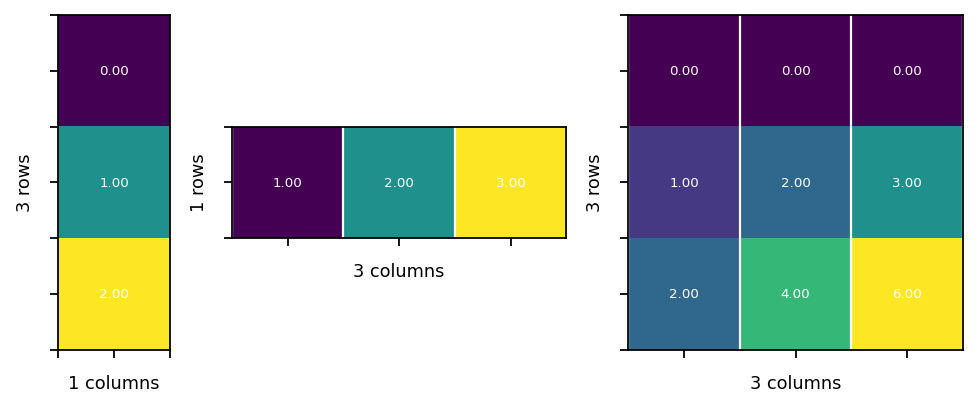

In [27]:
a = pt.tensor([[0, 1, 2]]).view(3, 1)
b = pt.tensor([1 ,2 ,3]).view(1, 3)
c = pt.mm(a, b)
assert pt.equal(c, pt.tensor([[0, 0, 0],[1, 2, 3],[2, 4, 6]]))
vis.plot_vector_multiplication_as_heatmap(a, b, c, annotate=True)
c

### Matrix multiplication

 The product $\mathbf {C}$ of two matrices $\mathbf{A}$ and $\mathbf{B}$ is defined as:
$$ C_{ik}=A_{ij}B_{jk} $$<br />
 in order for matrix multiplication to be defined, the dimensions of the matrices must satisfy
 $$
 (n×m)(m×p)=(n×p), $$
 where (a×b) denotes a matrix with a rows and b columns. Writing out the product explicitly,
 $${\displaystyle {\begin{bmatrix}c_{11}&c_{12}&\cdots &c_{1p}\\c_{21}&c_{22}&\cdots &c_{2p}\\\vdots &\vdots &\ddots &\vdots \\c_{m1}&c_{m2}&\cdots &c_{mp}\\\end{bmatrix}}}={\displaystyle {\begin{bmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\\\end{bmatrix}}{\begin{bmatrix}b_{11}&b_{12}&\cdots &b_{1p}\\b_{21}&b_{22}&\cdots &b_{2p}\\\vdots &\vdots &\ddots &\vdots \\b_{n1}&b_{n2}&\cdots &b_{np}\\\end{bmatrix}}} $$
 where<br />
 

$${\displaystyle c_{ij}=a_{i1}b_{1j}+a_{i2}b_{2j}+\cdots +a_{in}b_{nj}=\sum _{k=1}^{n}a_{ik}b_{kj}}$$<br />
example:
${\mathbf{A}}{\mathbf{B}}=\begin{bmatrix}0&1&2 \\ 3&4&5 \\ 6&7&8 \end{bmatrix}\begin{bmatrix}0&1&2 \\ 3&4&5 \\ 6&7&8 \end{bmatrix}=\begin{bmatrix}15&18&21\\42&54&66 \\69&90&111 \end{bmatrix}$
:


tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])

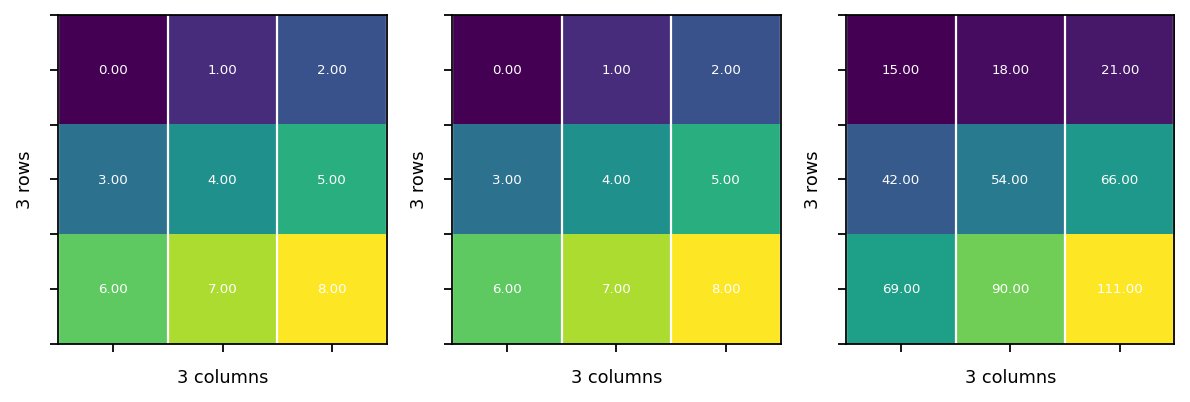

In [28]:
A = pt.tensor(
[
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
])
B = pt.tensor(
[
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
])
C = pt.mm(A, B)
assert pt.equal(C, pt.tensor([[15, 18, 21],[42, 54, 66],[69, 90, 111]]))
vis.plot_matrix_multiplication_as_heatmap(A, B, C, annotate=True)
C

example 2 : ${\mathbf{A}}{\mathbf{B}}=\begin{bmatrix}0&1&2 \\ 3&4&5 \\ 6&7&8 \end{bmatrix}\begin{bmatrix}0 \\ 3 \\ 6 \end{bmatrix}=\begin{bmatrix}15\\14\\23 \end{bmatrix}$

tensor([[15.],
        [42.],
        [69.]])

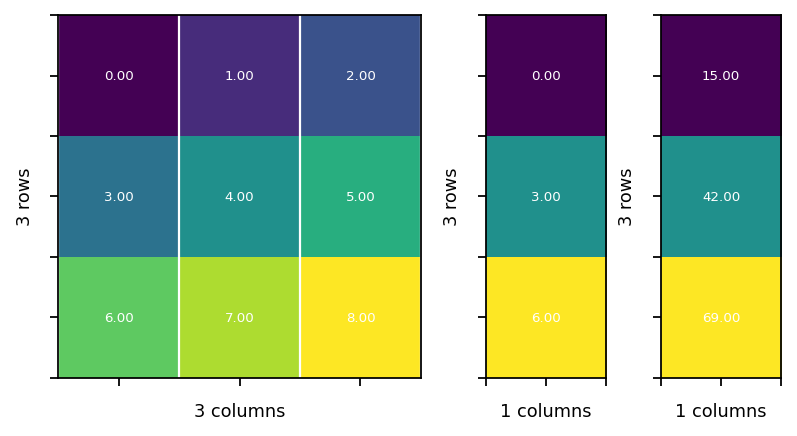

In [29]:
A = pt.tensor(
[
    [0., 1., 2.],
    [3., 4., 5.],
    [6., 7., 8.],
])
B = pt.tensor([[0., 3., 6.]]).view(3, 1)
C = pt.mm(A, B)
assert pt.equal(C, pt.tensor([15., 42., 69.]).view(3, 1))
vis.plot_matrix_vector_multiplication_as_heatmap(A, B, C, annotate=True)
C

### Identity matrix
An identity matrix is a given square matrix of any order which contains on its main diagonal elements with value of one, while the rest of the matrix elements are equal to zero.
$${\displaystyle I_{1}={\begin{bmatrix}1\end{bmatrix}},\ I_{2}={\begin{bmatrix}1&0\\0&1\end{bmatrix}},\ I_{3}={\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}},\ \cdots ,\ I_{n}={\begin{bmatrix}1&0&0&\cdots &0\\0&1&0&\cdots &0\\0&0&1&\cdots &0\\\vdots &\vdots &\vdots &\ddots &\vdots \\0&0&0&\cdots &1\end{bmatrix}}.}$$

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

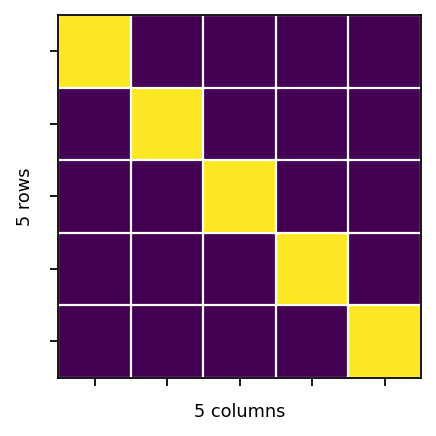

In [30]:
ones = pt.ones(5)
identity = pt.diag(ones)
assert pt.allclose(pt.eye(5), identity)
vis.plot_matrix_as_heatmap(identity, annotate=False)
identity

### Transpose of a matrix
The transpose of a matrix is a flipped version of the original matrix. We can transpose a matrix by switching its rows with its columns. 
$${[\mathbf {A} ^{\operatorname {T} }]_{ij}=\left[\mathbf {A} \right]_{ji}.}$$
If A is an m × n matrix, then $\mathbf {A}^T$ is an n × m matrix. $$\mathbf {A}={\begin{bmatrix}a_{{11}}&\dots &a_{{1n}}\\\vdots &&\vdots \\a_{{m1}}&\dots &a_{{mn}}\end{bmatrix}}\in K^{{m\times n}},{ \mathbf {A}^{\mathrm {T} }={\begin{bmatrix}a_{11}&\dots &a_{m1}\\\vdots &&\vdots \\a_{1n}&\dots &a_{mn}\end{bmatrix}}\in K^{n\times m}}.$$
example: <br />
${{\begin{bmatrix}1&3&5\\2&4&6\end{bmatrix}}={\begin{bmatrix}1&2\\3&4\\5&6\end{bmatrix}}^{\operatorname {T} }}$



tensor([[1, 2],
        [3, 4],
        [5, 6]])

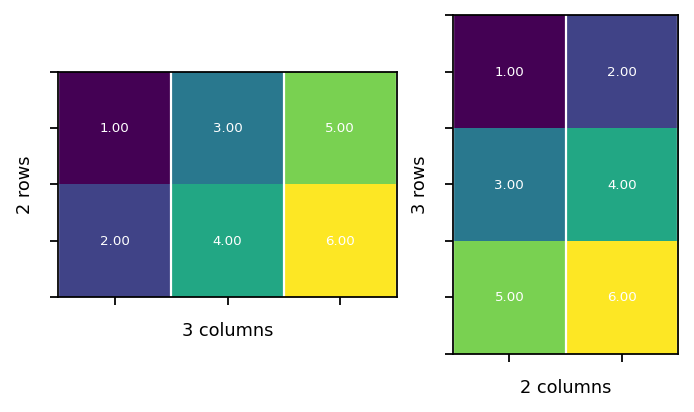

In [31]:
A = pt.tensor(
[ 
    [1, 3, 5],
    [2, 4, 6]
])
AT = pt.tensor(
[ 
    [1, 2],
    [3, 4],
    [5, 6]
])
assert (A.T - AT).sum().item() == 0
vis.plot_matrix_transpose_as_heatmap(A, AT, annotate=True)
AT

### Symmetric matrix
A symmetric matrix is a square matrix that is equal to its transpose.
$${\mathbf{A}{\text{ is symmetric}}\iff \mathbf{A}=\mathbf{A}^{\textsf {T}}}$$<br />
The entries of a symmetric matrix are symmetric with respect to the main diagonal. So if ${ a_{ij}}$ denotes the entry in the $i-{th}$ row and ${j-th}$ column then:
$${\mathbf{A}{\text{ is symmetric}}\iff {\text{ for every }}i,j,\quad \mathbf{a}_{ji}=\mathbf{a}_{ij}}$$<br />
example:${\begin{bmatrix}1&2&6\\2&3&4\\6&4&5\end{bmatrix}}$


tensor([[1, 2, 6],
        [2, 3, 4],
        [6, 4, 5]])

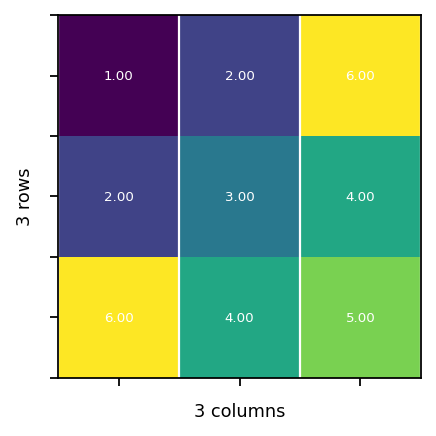

In [32]:
A = pt.tensor(
[ 
    [1, 2, 6],
    [2, 3, 4],
    [6, 4, 5],
])
A_transpose = pt.transpose(A, 0, 1)
assert pt.equal(A, A_transpose)
vis.plot_matrix_as_heatmap(A, annotate=True)
A_transpose

### Orthogonal matrix
when the product of a square matrix and its transpose gives an identity matrix, then the square matrix is known as an orthogonal matrix.
$$\mathbf{Q^T} \mathbf{Q} = \mathbf{I}$$<br />
example:${\mathbf{Q}=1/3 \begin{bmatrix}1&-2&2\\2&-1&-2\\2&2&1\end{bmatrix}}$,$\quad$ ${\mathbf{Q^{T}}=1/3 \begin{bmatrix}1&2&2\\-2&-1&2\\2&-2&1\end{bmatrix}}$ <br /><br />
${\mathbf{Q}}{\mathbf{Q^{T}}}=1/3 \times 1/3\begin{bmatrix}1&-2&2 \\ 2&-1&-2 \\ 2&2&1 \end{bmatrix}\begin{bmatrix} 1&2&2 \\ -2&-1&2 \\ 2&-2&1 \end{bmatrix}=\begin{bmatrix}1&0&0\\0&1&0 \\0&0&1 \end{bmatrix}$

tensor([[ 1.0000e+00,  6.6227e-09, -3.3114e-09],
        [ 6.6227e-09,  1.0000e+00,  3.3114e-09],
        [-3.3114e-09,  3.3114e-09,  1.0000e+00]])

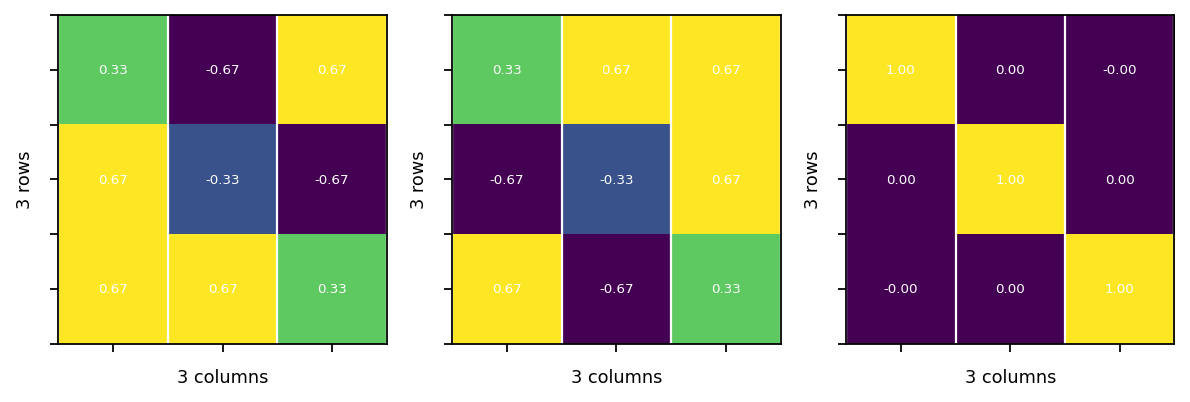

In [33]:
Q = pt.tensor(
[ 
    [1.0/3, -2.0/3, 2.0/3],
    [2.0/3, -1.0/3, -2.0/3],
    [2.0/3, 2.0/3, 1.0/3],
])

QT = pt.transpose(Q, 0, 1)
I = pt.mm(Q, QT)
assert pt.allclose(pt.eye(3), pt.mm(Q, QT))
vis.plot_matrix_multiplication_as_heatmap(Q, QT, I, annotate=True)
I

### Orthonormal matrix
The vectors $ \mathbf{q_1}, ... , \mathbf{qn} $ are orthonormal if:
$$\mathbf{q_{i}^{T}}\cdot \mathbf{q_{j}}={\begin{cases}0&{\text{when}}~i\neq j\quad\text{(orthogonal vectors)} \\1&{\text{when}~i=j\quad\text{(unit vectors: $||\mathbf{q_{i}}||$ = 1)}}\end{cases}}$$<br />
A Matrix $\mathbf{Q}$ with orthonormal columns satisfies $\mathbf{Q^T} \mathbf{Q} = I$ :$$\mathbf{Q^T} \mathbf{Q} = \begin{bmatrix}\mathbf{q_{1}^T} \\ \mathbf{q_{2}^T}  \\ \vdots \\ \mathbf{q_{n}^T} \end{bmatrix}\begin{bmatrix}\mathbf{q_{1}}&\mathbf{q_{2}}&\dots&\mathbf{q_{n}}\end{bmatrix}=\begin{bmatrix}1&0&0&\cdots &0\\0&1&0&\cdots &0\\0&0&1&\cdots &0\\\vdots &\vdots &\vdots &\ddots &\vdots \\0&0&0&\cdots &1\end{bmatrix}=I$$<br />

example:
${\mathbf{Q}=\begin{bmatrix}{\frac {1}{\sqrt{2}}}&{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\\{\frac {-1}{\sqrt{2}}}&{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\\0&{\frac {-2}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\end{bmatrix}},$$\quad$ ${\mathbf{Q^{T}}=\begin{bmatrix}{\frac {1}{\sqrt{2}}}&{\frac {-1}{\sqrt{2}}}&0\\{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{6}}}&{\frac {-2}{\sqrt{6}}}\\{\frac {1}{\sqrt{3}}}&{\frac {1}{\sqrt{3}}}&{\frac {1}{\sqrt{3}}}\end{bmatrix}}$ <br /><br />
${\mathbf{Q}}{\mathbf{Q^{T}}}=\begin{bmatrix}{\frac {1}{\sqrt{2}}}&{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\\{\frac {-1}{\sqrt{2}}}&{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\\0&{\frac {-2}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\end{bmatrix}\begin{bmatrix}{\frac {1}{\sqrt{2}}}&{\frac {-1}{\sqrt{2}}}&0\\{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{6}}}&{\frac {-2}{\sqrt{6}}}\\{\frac {1}{\sqrt{3}}}&{\frac {1}{\sqrt{3}}}&{\frac {1}{\sqrt{3}}}\end{bmatrix}=\begin{bmatrix}1&0&0\\0&1&0 \\0&0&1 \end{bmatrix}$

tensor([[ 1.0000e+00,  7.9027e-09, -2.1900e-08],
        [ 7.9027e-09,  1.0000e+00, -2.1900e-08],
        [-2.1900e-08, -2.1900e-08,  1.0000e+00]])

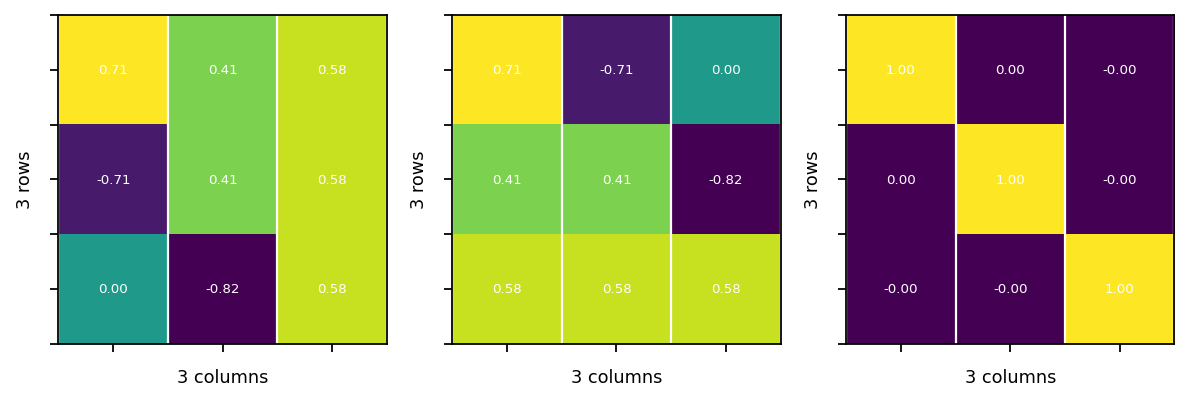

In [34]:
Q = pt.tensor(
[ 
    [1./sqrt(2), 1./sqrt(6), 1./sqrt(3)],
    [-1./sqrt(2), 1./sqrt(6), 1./sqrt(3)],
    [0./sqrt(2), -2./sqrt(6), 1./sqrt(3)],
])
QT = pt.transpose(Q, 0, 1)
I = pt.mm(Q, QT)
assert pt.allclose(pt.eye(3), pt.mm(Q, QT),atol=1.0E-4)
vis.plot_matrix_multiplication_as_heatmap(Q, QT, I, annotate=True)
I

### Hermitian matrix 
a Hermitian matrix (or self-adjoint matrix) is a complex square matrix that is equal to its own conjugate transpose
$${ \mathbf{A}={\overline {\mathbf{A}𝐀^{\mathsf {T}}}}}$$
example:
<br />
${\begin{bmatrix}1&3-{\mathrm  {j}}&4\\3+{\mathrm  {j}}&-2&-6+{\mathrm  {j}}\\4&-6-{\mathrm  {j}}&5\end{bmatrix}} \Rightarrow \text{complex conjugate}$$\quad $$ {\begin{bmatrix}1&3+{\mathrm  {j}}&4\\3-{\mathrm  {j}}&-2&-6-{\mathrm  {j}}\\4&-6+{\mathrm  {j}}&5\end{bmatrix}}\Rightarrow   {\text{conjugate transpose}} $$\quad $$ {\begin{bmatrix}1&3-{\mathrm  {j}}&4\\3+{\mathrm  {j}}&-2&-6+{\mathrm  {j}}\\4&-6-{\mathrm  {j}}&5\end{bmatrix}}={\begin{bmatrix}1&3&4\\3&-2&-6\\4&-6&5\end{bmatrix}}+\mathrm  {j}{\begin{bmatrix}0&-1&0\\1&0&1\\0&-1&0\end{bmatrix}}$


tensor([[ 1.+-0.j,  3.-1.j,  4.+-0.j],
        [ 3.+1.j, -2.+-0.j, -6.+1.j],
        [ 4.+-0.j, -6.-1.j,  5.+-0.j]])

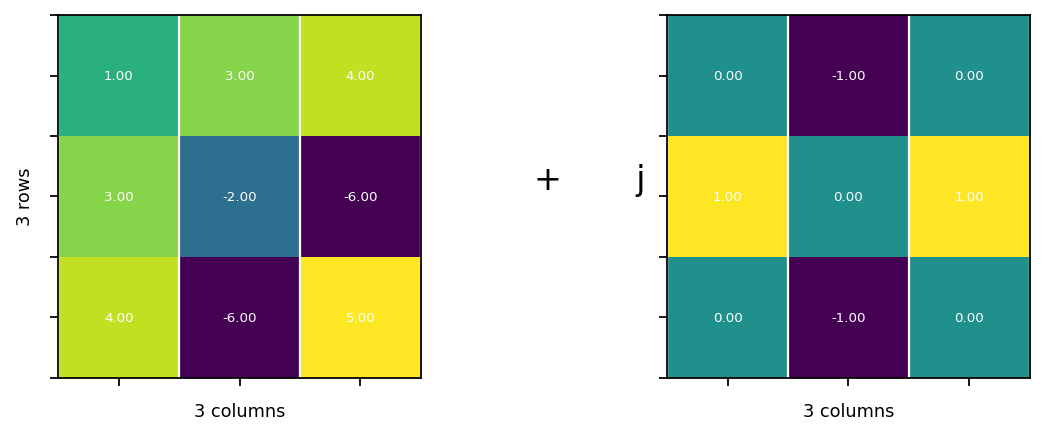

In [35]:
AH = pt.tensor(
[ 
    [1., 3.-1j , 4.],
    [3.+1j, -2., -6.+1j],
    [4., -6.-1j, 5.],
])
A_H = AH.conj().T
assert pt.allclose(AH, AH.conj().T)
vis.plot_2_matries_as_heatmap(AH.real, AH.imag, annotate=True)
A_H

### unitary matrix
A unitary matrix $\mathbf{Q}$ is a (complex) square matrix that has orthonormal columns.</br>
and every matrix $\mathbf{Q}$ with orthonormal columns satisfies :$$ \mathbf{Q}^H \mathbf{Q} = \mathbf{I}$$</br>
</br>
example:
${\mathbf{Q}={\frac {1}{2}}\begin{bmatrix}1+i&1-i\\1-i&1+i\end{bmatrix}}$ <br /><br />
${\mathbf{Q}\mathbf{Q^{H}}={\frac {1}{4}}\begin{bmatrix}1+i&1-i\\1-i&1+i\end{bmatrix}}{\begin{bmatrix}1-i&1+i\\1+i&1-i\end{bmatrix}}=\begin{bmatrix}1&0\\0&1 \end{bmatrix}= \mathbf{I}$


tensor([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]])

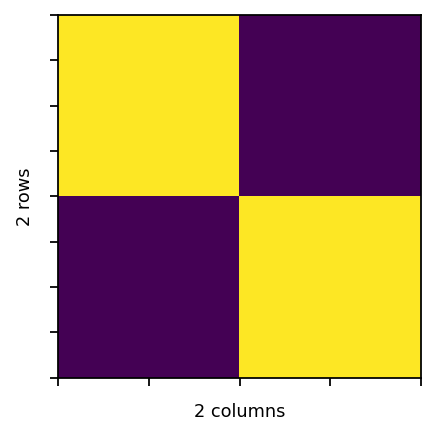

In [36]:
Q = pt.tensor(
[ 
    [(1+1j)/2, (1-1j)/2],
    [(1-1j)/2, (1+1j)/2],
])
Q_conj = pt.conj(Q)
Q_H = pt.transpose(Q_conj, 1, 0)
I = pt.matmul(Q, Q_H)
I_real = pt.real(I)
vis.plot_matrix_as_heatmap(I_real, annotate=False)
I

## Matrix decomposition
### Eigen-decomposition
Matrix decompositions are a useful tool for reducing a matrix to their constituent parts in order to simplify a range of more complex operations.<br />
Let $\mathbf{A}$ be a square n × n matrix with n linearly independent eigenvectors $\mathbf{q_i}$(where i = 1, ..., n). Then $\mathbf{A}$ can be factorized as :
$$\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1} $$

where $\mathbf{Q}$ is the square n × n matrix whose ith column is the eigenvector $\mathbf{q_i}$ of $\mathbf{A}$, and $\mathbf{Λ}$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues<br />
example:
${\mathbf{A}}=\begin{bmatrix}-0.23&-0.79&0.41 \\ -0.53&-0.09&-0.82 \\ -0.82&0.61&0.41 \end{bmatrix}\begin{bmatrix}\lambda&0&0 \\ 0&\lambda&0 \\ 0&0&\lambda \end{bmatrix}\begin{bmatrix}-0.23&-0.79&0.41 \\ -0.53&-0.09&-0.82 \\ -0.82&0.61&0.41 \end{bmatrix}^{-1}=\begin{bmatrix}1&2&3 \\ 4&5&6 \\ 7&8&9 \end{bmatrix}$

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 tensor([[1.0000, 2.0000, 3.0000],
         [4.0000, 5.0000, 6.0000],
         [7.0000, 8.0000, 9.0000]]))

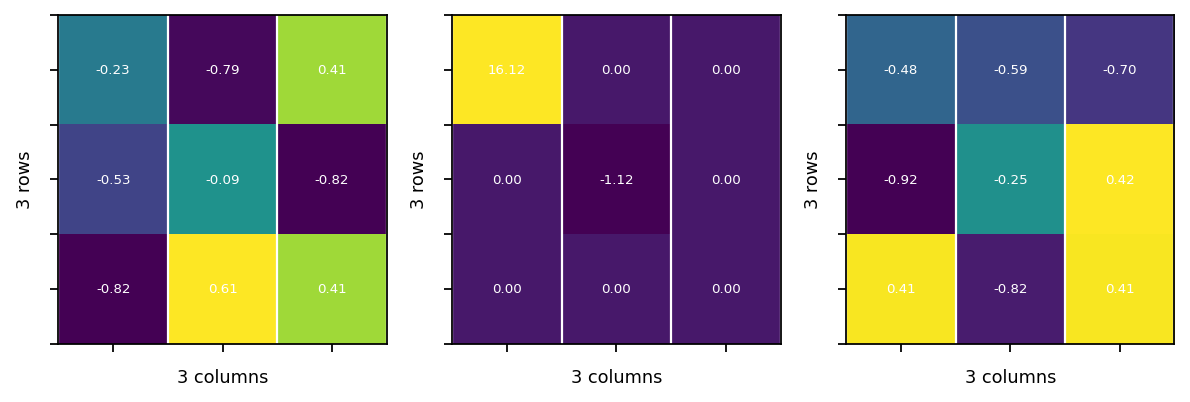

In [37]:
A = pt.tensor(
[
    [1., 2., 3.],
    [4., 5., 6.],
    [7., 8., 9.],
])
eigenvalues, eigenvectors = pt.eig(A, eigenvectors=True)
# A = Q . diag(eigenvalues) . Q^-1
Q = eigenvectors
diagEigenVals = pt.diag(eigenvalues[:,0])
invQ = pt.inverse(Q)
compose = Q.mm(diagEigenVals).mm(invQ)
assert pt.allclose(A, Q.mm(diagEigenVals).mm(invQ))
vis.plot_matrix_multiplication_as_heatmap(eigenvectors, diagEigenVals, invQ, annotate=True)
A,compose

### Singular value decomposition
the singular value decomposition (SVD) is a factorization of a real or complex matrix that generalizes the eigendecomposition of a square normal matrix to any ${ m\times n}$ matrix via an extension of the polar decomposition:$$\mathbf{A} = \mathbf{U}\Sigma\mathbf{V}^T$$
where:<br />
$\mathbf{A}$: m$\times$n matrix that we wish to decompose<br />
$\mathbf{U}$: is m$\times$m matrix where matrix $\mathbf{U}$ is also known as left-singlular vectors of $\mathbf{A}$<br />
$\Sigma$ : m$\times$n diagonal matrix where the diagonal values are known as singular values<br />
$\mathbf{V}^T$: Transpose of an n$\times$n matrix where matrix V is also right-singular vectors of $\mathbf{A}$<br />
$\mathbf{U}^T\mathbf{U}$ = $\mathbf{I}_{nxn}$ ,
$\mathbf{V}^T\mathbf{V}$ = $\mathbf{I}_{mxm}$ (i.e. U and V are orthogonal)<br /><br />
example:<br /> 
$\mathbf{A}$=$\begin{bmatrix}1&2 \\ 3&4 \\ 5&6 \end{bmatrix}$=$\begin{bmatrix}-0.23&0.88&0.41\\-0.52&0.24&-0.82\\-0.82&-0.4&0.41 \end{bmatrix}\begin{bmatrix}9.53&0\\0&0.51\\0&0 \end{bmatrix}\begin{bmatrix}-0.62&-0.78\\-0.78&0.62 \end{bmatrix}$

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 tensor([[1.0000, 2.0000],
         [3.0000, 4.0000],
         [5.0000, 6.0000]]))

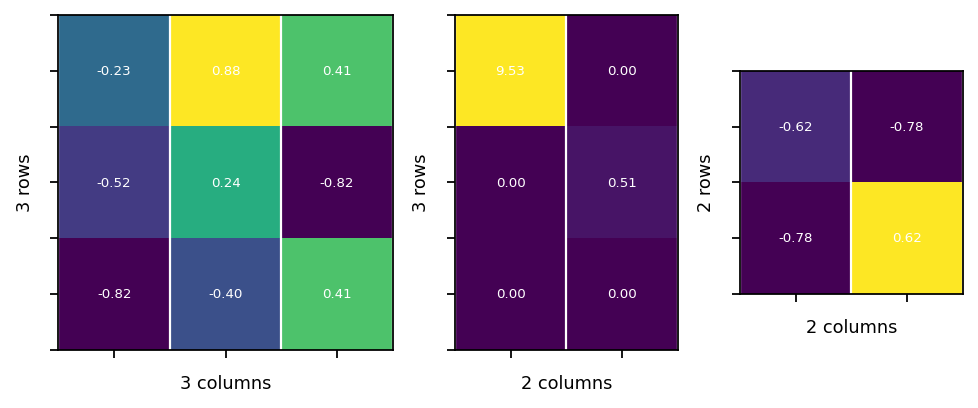

In [38]:
A = pt.tensor([[1., 2.], [3., 4.], [5., 6.]])
U, d, VT = pt.svd(A, some=False, compute_uv=True)
D = pt.diag(d)
Sigma = pt.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[1], :A.shape[1]] = D
O = U.mm(Sigma.mm(VT))
assert pt.allclose(A, U.mm(Sigma.mm(VT)))
vis.plot_SVD_as_heatmap(U, Sigma, VT, annotate=True)
A,O